# Assess-Depth-Region-from-Depthplot-to-Generate-Core-Calibrated-Thin-Sections-and-Pc-Curves-from-norm

### Assess a certain depth interval from a Depth Plot to estimate the Petrophysical properties of that interval

There are times when a Petrophysicist wants to assess a certain depth interval from a Depth Plot to estimate the Petrophysical properties for that interval. In this instance we select a depth location from an NMR log that is initially plotted as a Depth Plot, and then the program creates a widget with the Petrophysical estimations based on the core data. 

This repository utilizes normalized core data with distance-weighted estimations for only the KNN samples being considered. This program queries a clastic core analysis database having Thomeer Capillary Pressure parameters and another with links to a few available Thin Sections to generate a widget showing both an estimated Capillary Pressure curves and representative Thin Sections for a certain interval of the reservoir. The results are based entirely on the core data being employed that represents this clastic reservoir. This repository uses normalized core porosity and permeability data for the estimations based on KNN with Euclidean distances. 

The objective of this core integration project is to generate representative Petrophysical data for user defined porosity and permeability combinations (taken from depth plot) and is calibrated to the core reference data. Our reference data is a clastic core analysis database. The core analysis database being queried has porosity and permeability as well as the Thomeer-based Capillary Pressure parameters, BVi, Pdi and Gi used with each pore system i. There is also a core database with links to a few available Thin Sections based on their poro-perm relationships. 

For this repository we are using the inverse of the Euclidean distances for normalized porosity and permeability data to generate the distance-weighted KNN Thomeer Capillary Pressure parameters or the nearest representative Thin Section image based on the normalized poro-perm relationships of the data. This process is based on the Euclidean distance difference between the normalized core analysis reference poro-perm data vs. the normalized user defined poro-perm combination and the inverse of the n nearest Euclidean distances are the only values being used for the distance-weighted averages. 


![Summary_Image](NMR_pick.png)




### Code:

###### Load dependencies

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Aug 27 09:50:53 2019

@author: craig
"""


import sys
#import os

from PyQt5.QtWidgets import QApplication, QMainWindow, QSizePolicy, QPushButton
#from PyQt5.QtWidgets import QApplication, QMainWindow, QMenu, QVBoxLayout, QSizePolicy, QMessageBox, QWidget, QPushButton
#from PyQt5.QtGui import QIcon
#******************************************************************
import matplotlib
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
matplotlib.use("Qt5Agg")
#******************************************************************
#from PyQt5 import QtCore
#from PyQt5 import QtGui
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib.gridspec as gridspec
#import matplotlib.pyplot as plt

import numpy as np
from numpy import diff
import math
import xlrd
from colorama import Fore, Style

import pandas as pd


###### Read in CMR Data from Excel Sheet

In [2]:
# =============================================================================
# # ===========================================================================
# # #-------------------------------------------------------------------------- 
# # #                Panda Read in CMR Data from Excel File
# # #  
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================


# read Excel (2003) File:
data_xls = pd.ExcelFile('CMR.xls')

data = data_xls.parse('Sheet1',   na_values=['NA'])


###### Make Depth Plot to select depth interval to evaluate. We are not selecting from Depth Plot with this Notebook. 

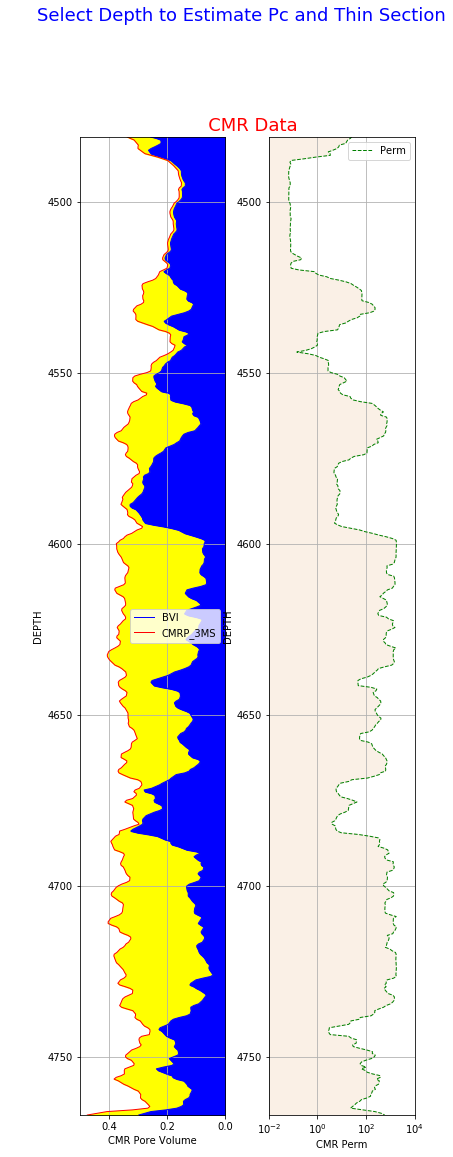

In [3]:
# =============================================================================
# # ===========================================================================
# # #-------------------------------------------------------------------------- 
# # #     Plot to select Depth level to assess the Petrophysical Properties
# # #       at that level
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================


fig = plt.figure(figsize=(6, 18)) # manually adjust x,y dimension of plot canvas
fig.suptitle('Select Depth to Estimate Pc and Thin Section',fontsize=18, color = 'blue')
fig.subplots_adjust(wspace=0.3) # space between subplots in [inch]

#Basic NMR Effective Porosity and BVI
ax = fig.add_subplot(1,2,1 ) ## (total number of rows,columns, index of this subplot)
ax.plot(data['BVI']     , data['DEPTH'], 'b-', linewidth=1, label='BVI') 
ax.plot(data['CMRP_3MS'], data['DEPTH'], 'r-' ,linewidth=1, label='CMRP_3MS')
ax.plot(data['Zaro']    , data['DEPTH'], 'r-' ,linewidth=0)

plt.xlim(0.5, 0.0)
plt.xlabel('CMR Pore Volume')
plt.ylabel('DEPTH')
plt.title('                                   CMR Data', fontsize=18, color = 'red') # Title of this subplot
plt.grid(True) 
plt.ylim(max(data['DEPTH']),min(data['DEPTH']))
plt.legend()


plt.fill_betweenx(data['DEPTH'],data['CMRP_3MS'], where=data['CMRP_3MS'] > 0,interpolate=True, color = 'yellow')
plt.fill_betweenx(data['DEPTH'],data['BVI'], where=data['BVI'] > 0.0,interpolate=True , color ='blue')


#NMR Permeability
ax = fig.add_subplot(1,2,2) 
ax.semilogx(data['PERM_CMR'],  data['DEPTH'], 'g--' , linewidth=1, label='Perm') 
plt.xlim(0.01, 10000)
plt.xlabel('CMR Perm') 
plt.ylabel('DEPTH')
plt.grid(True) 
plt.ylim(max(data['DEPTH']),min(data['DEPTH'])) 
plt.legend()

plt.fill_betweenx(data['DEPTH'],data['PERM_CMR'], where=data['CMRP_3MS'] > 0,interpolate=True, color = 'linen')


### Graphical Input of Depth level (not available with this Jupyter Notebook). Depth set at 4550' for this example.

In [4]:
# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# ##
# ##            Graphical Input of CMR Depth Level
# ##
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================

def tellme(s):
    print(s)
    plt.title(s, fontsize=16, color = 'blue')
    plt.draw()


#Use pts array to store selected points
pts = []

"""
This will not work with Jupyter Notebook so hard coding depth level below
while len(pts) < 1:
    #tellme('Select Poro-Perm point with mouse')
    pts = np.asarray(plt.ginput(1, timeout=3))
Depth_select = round(pts.item(1))
"""
Depth_select = 4550


myarray=np.array(data)

for m in range(0,len(myarray) ,1):
    if Depth_select == myarray[m,0]:
        Por = myarray[m,1]
        Perm = myarray[m,4]
        bvi = myarray[m,3]
 


print()
print('Depth', Depth_select, ', Porosity =', Por, ' and Permeability =', Perm)
print()

plt.close('all')  



Depth 4550 , Porosity = 0.26922  and Permeability = 3.604261469184647



###### Read in Excel Reference Data for Thin Section links to assign a representative Thin Section

In [5]:
# =============================================================================
# # ===========================================================================
# # #-------------------------------------------------------------------------- 
# # #                Read in Excel Reference Spreadsheet
# # #  Read Clastic por, perm and Clastic Thin Section links 
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================

book = xlrd.open_workbook("Poro-Perm_Image_from_web.xls")   
#print( "The number of worksheets is", book.nsheets)
#print( "Worksheet name(s):", book.sheet_names())
sh = book.sheet_by_index(0)
#print(sh.name, sh.nrows, sh.ncols)
#print()

import win32com.client
o = win32com.client.Dispatch("Excel.Application")
#o.Visible = 1
#o.Workbooks.Add() # for office 97  95 a bit different!
    

Depth = []
Porosity_TS = []
Permeability_TS = []
Path_TS = []
TS=False
    
for i in range(0,sh.nrows,1):
        Depth.append(sh.cell_value(rowx=i, colx=0))
        Porosity_TS.append(sh.cell_value(rowx=i, colx=1))
        Permeability_TS.append(sh.cell_value(rowx=i, colx=2))
        Path_TS.append(sh.cell_value(rowx=i, colx=3))

x3=np.array(Porosity_TS)
y3=np.array(Permeability_TS)



###### Assign Representative Thin Section

In [6]:
# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# ##
# ##            Finish Thin Section assignments 
# ##
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
Perm_max = 4
Perm_min = -4
Por_max = .5
Por_min = 0


por = (Por-Por_min)/(Por_max - Por_min)
perm= (math.log10(Perm) - Perm_min)/(Perm_max - Perm_min)


dist_inv = []
dist_phi = []
dist_lperm = []
inv_dist_array2 = []
dist_inv_total=0

#------------------------------------------------------------------------------ 
#          Display Representative Thin Section
#------------------------------------------------------------------------------

Porosity_norm_ts     = []
Permeability_norm_ts = []


for i in range(0,sh.nrows,1):

        Porosity_norm_ts.append((Porosity_TS[i] - Por_min) / (Por_max - Por_min))
        Permeability_norm_ts.append((math.log10(Permeability_TS[i]) - Perm_min) / (Perm_max - Perm_min))

        #Euclidian Distance
        dist_phi.append(   abs(por  - Porosity_norm_ts[i]    ))  
        dist_lperm.append( abs(perm - Permeability_norm_ts[i]))
        dist_inv.append( 1  /  math.sqrt(  dist_phi[i]**2 + dist_lperm[i]**2)  )


        inv_dist_array2.append(dist_inv)


a = np.array(inv_dist_array2) 
inv_dist_thresh = np.percentile(a, 99.999)


#plt.figure(2)        
for p in range(0,sh.nrows ,1):        
        if dist_inv[p] > inv_dist_thresh - 0.001 and dist_inv[p] > 1:
            TS = Path_TS[p]
            Por_TS = Porosity_TS[p]
            Perm_TS = Permeability_TS[p]
       

#            print("     Reference Data: Porosity =",Porosity[p], ", Permeability =", Permeability[p],", Inv Dist '",dist_inv[i],TS)
            print(Fore.RED +"     Porosity of TS =",Porosity_TS[p], ", Permeability of TS =", Permeability_TS[p])
            print(Fore.RED +"     Inv Dist '",dist_inv[p],", TS Image =", Path_TS[p])    
            img=mpimg.imread(TS)

if not TS :
    print("     'No Representative Thin Section'")
    TS = 'blank.PNG'
    Por_TS = 0
    Perm_TS = 0
    img=mpimg.imread(TS)               
    
else:
    print(Fore.RED + "     ------------------------------------------------------------")
       
print(Style.RESET_ALL) 

plt.close('all')
quit


     Porosity of TS = 0.2696428 , Permeability of TS = 5.157
     Inv Dist ' 51.37167418711412 , TS Image = Medium-highSS.png
     ------------------------------------------------------------



###### Read in Thomeer Reference data from Clastic Database

In [7]:
# =============================================================================
# # ===========================================================================
# # #-------------------------------------------------------------------------- 
# # #               
# # #  Read mapinv_reference_data_carbonates_calculated Thomeer data 
# # #                which is Clastic Thomeer reference data
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================

#book = xlrd.open_workbook("mapinv_reference4.xls")  - original mapinv_reference
book = xlrd.open_workbook("Thomeer_clastics.xls")   #mapinv_reference cleaned up of obscure tri-modal samples

#print( "The number of worksheets is", book.nsheets)
#print( "Worksheet name(s):", book.sheet_names())
sh = book.sheet_by_index(0)
#print(sh.name, sh.nrows, sh.ncols)

import win32com.client
o = win32com.client.Dispatch("Excel.Application")
#o.Visible = 1
#o.Workbooks.Add() # for office 97  95 a bit different!


# ---------------------------------------------------------------------------- 
#                  Initialize DATA 
# ----------------------------------------------------------------------------

Permeability = []
Porosity = []
G1 = []
PD1 = []
BV1 = []
G2 = []
PD2 = []
BV2 = []
Mode = []


# ------------------------------------------------------------------ 
#    read in maininv_reference2 data which is just Rosetta Stone 
#                     this is reference data
#                       DATA WILL BE LOADED
# ------------------------------------------------------------------


for i in range(0,sh.nrows,1):
        Permeability.append(sh.cell_value(rowx=i, colx=1))
        Porosity.append(sh.cell_value(rowx=i, colx=2))   #fraction
        G1.append(sh.cell_value(rowx=i, colx=3))
        PD1.append(sh.cell_value(rowx=i, colx=4))
        BV1.append(sh.cell_value(rowx=i, colx=7))
        G2.append(sh.cell_value(rowx=i, colx=5))
        PD2.append(sh.cell_value(rowx=i, colx=6))
        BV2.append(sh.cell_value(rowx=i, colx=8))
        Mode.append(sh.cell_value(rowx=i, colx=9))        
        



x4=np.array(Porosity)
y4=np.array(Permeability)


# =============================================================================
# # ===========================================================================
# # #------------------------------------------------------------ 
# # #               
# # #     End of reading in mapinv reference data
# # #------------------------------------------------------------
# # ===========================================================================
# =============================================================================



###### KNN for Thomeer Parameter estimations

In [8]:
# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# ##
# ##            This is the beginnin of normalized KNN 
# ##
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================


por = (Por-Por_min)/(Por_max - Por_min)
perm= (math.log10(Perm) - Perm_min)/(Perm_max - Perm_min)



#Por = float(input('Input Porosity (fraction) = '))
#Perm = float(input('Input Permeability (mD) = '))



# =============================================================================
# #---------------------------------------------------------------------------- 
# #           
# #              ESTIMATE THOMEER PARAMETERS FOR BOTH PORE SYSTEMS
# #                   
# #----------------------------------------------------------------------------
# =============================================================================

dist_inv = []
dist_phi = []
dist_lperm = []
G1_weight = []
PD1_weight = []
BV1_weight = []
G2_weight = []
PD2_weight = []
BV2_weight = []



dist_inv_total=0
G1_total  = 0
PD1_total = 0
BV1_total = 0
G2_total  = 0
PD2_total = 0
BV2_total = 0




inv_dist_array = []

distance_knn_array = []


#------------------------------------------------------------------ 
#               Estimate all Thomeer Parameters for *_est values
#-------------------------------------------------------------------

Porosity_norm     = []
Permeability_norm = []


#this is Euclidean Distnce
for i in range(0,sh.nrows,1):

        Porosity_norm.append((Porosity[i] - Por_min) / (Por_max - Por_min))
        Permeability_norm.append((math.log10(Permeability[i]) - Perm_min) / (Perm_max - Perm_min))
        
        #Euclidian Distance
        dist_phi.append(   abs(por  - Porosity_norm[i]    ))  
        dist_lperm.append( abs(perm - Permeability_norm[i]))
        dist_inv.append( 1  /  math.sqrt(  dist_phi[i]**2 + dist_lperm[i]**2)  )

        
        #calculalte weights for each
        G1_weight.append(dist_inv[i]  * G1[i])
        PD1_weight.append(dist_inv[i] * PD1[i])
        BV1_weight.append(dist_inv[i] * BV1[i])
        G2_weight.append(dist_inv[i]  * G2[i])
        PD2_weight.append(dist_inv[i] * PD2[i])
        BV2_weight.append(dist_inv[i] * BV2[i])
        


        inv_dist_array.append(dist_inv[i]);  # add items

# =============================================================================
###                    KNN Array
# # ===========================================================================
# # #--------------------------------------------------------------------------
        distance_knn_array = [dist_inv, G1_weight, PD1_weight, BV1_weight, G2_weight, PD2_weight, BV2_weight]
#        distance_knn_array = [Permeability, Porosity, G1, PD1, BV1, G2, PD2, BV2]
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
xnorm=np.array(Porosity_norm)
ynorm=np.array(Permeability_norm)


# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# # #           
# # #               Transpose and Sort new kNN array
# # #                   
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================

#knn_array = np.transpose array
knn_array = np.transpose(distance_knn_array)

#matsor x[x[:,column].argsort()[::-1]] and -1 us reverse order
mat_sort = knn_array[knn_array[:,0].argsort()[::-1]] #firt column reverse sort (-1)


###### Estimate Thomeer Parameters for discrete Depth Interval

In [9]:
# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# # #           
# # #               Calculate knn Thomeer Parameters
# # #                   
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================


#------------------------------------------------------------------------------
#    Number of nearest Neighbors
#------------------------------------------------------------------------------
n_neighbors = 3
#------------------------------------------------------------------------------

dist_inv_total_knn = 0
G1_total_knn = 0
PD1_total_knn = 0
BV1_total_knn = 0
G2_total_knn = 0
PD2_total_knn = 0
BV2_total_knn = 0




#kNN Estimates for first 3 rows

for i in range(0,n_neighbors,1):
    dist_inv_total_knn = dist_inv_total_knn + mat_sort[i][0]
    G1_total_knn  = G1_total_knn + mat_sort[i][1]
    PD1_total_knn = PD1_total_knn + mat_sort[i][2]
    BV1_total_knn = BV1_total_knn + mat_sort[i][3]
    G2_total_knn  = G2_total_knn + mat_sort[i][4]
    PD2_total_knn = PD2_total_knn + mat_sort[i][5]
    BV2_total_knn = BV2_total_knn + mat_sort[i][6]


#back to k values and calculate estimations now
G1_est_knn  = G1_total_knn  / dist_inv_total_knn
PD1_est_knn = PD1_total_knn / dist_inv_total_knn
BV1_est_knn = (BV1_total_knn / dist_inv_total_knn)
G2_est_knn  = G2_total_knn  / dist_inv_total_knn
PD2_est_knn = PD2_total_knn / dist_inv_total_knn
BV2_est_knn = (BV2_total_knn / dist_inv_total_knn)


###### Calculate Mode of Pore Throat Distribution Precisely from Thomeer G1 and PD1

In [10]:
Mode_knn = math.exp(-1.15*G1_est_knn)*(214/PD1_est_knn)

if Mode_knn > 5 :
    RxType = 'Macro Porous Rock'
elif Mode_knn < 5 and Mode_knn > 2:
    RxType = 'Lower Quality Macro Porous Rock'
elif Mode_knn < 2  and Mode_knn > 0.2:
    RxType = 'Meso Porous Rock'
else:
    RxType = 'Micro Porous Rock'
    

###### Print results

In [11]:
print()
print(Fore.GREEN +'Estimated Thomeer Parameters from KNN =',n_neighbors,' on normlalized Poro-Perm data')
print(Fore.GREEN + '     G1 =',G1_est_knn, ',  Pd1 =',PD1_est_knn, ', BV1(%) =',BV1_est_knn) 
print(Fore.GREEN + '     G2 =',G2_est_knn, ',  Pd2 =',PD2_est_knn, ' , BV2(%) =',BV2_est_knn)
print(Fore.GREEN + '     Mode of PTD using Thomeer =',Mode_knn, 'or', RxType) 
#print(Style.RESET_ALL) 



Estimated Thomeer Parameters from KNN = 3  on normlalized Poro-Perm data
     G1 = 0.7749418405498565 ,  Pd1 = 27.738100012674142 , BV1(%) = 23.543195980938457
     G2 = 0.2734107689051233 ,  Pd2 = 763.3297154366702  , BV2(%) = 2.3562846807234004
     Mode of PTD using Thomeer = 3.1644712452973978 or Lower Quality Macro Porous Rock


###### Calculate height above FWL for Pc curves

In [12]:
hatPd = (PD1_est_knn*26/367)/(0.433*(1.1-0.74))

###### Calculate Pc curve

In [13]:
Pc = 0.5
bvarray = []
pcarray = []

for j in range(1, 105, 1):
    if Pc > PD1_est_knn:
        BVOCC1 = BV1_est_knn * 10**((-0.434 * G1_est_knn) / math.log10(Pc / PD1_est_knn))
    else:
        BVOCC1 = 0.001

    if Pc > PD2_est_knn:
        BVOCC2 = BV2_est_knn * 10**((-0.434 * G2_est_knn) / math.log10(Pc / PD2_est_knn))
    else:
        BVOCC2 = 0.001


    BVOCC = BVOCC1 + BVOCC2
    
    bvarray.append(BVOCC)
    pcarray.append(Pc)
    
    Pc = Pc * 1.12

   
x=np.array(bvarray)
y=np.array(pcarray)



###### Estimate Thomeer Parameters from Clastic Correlations

In [14]:
#------------------------------------------------------------------------------ 
#          Estimate Thomeer Parameters from Clastic Correlations
#------------------------------------------------------------------------------

Mode_corr =10**(0.41338 + 0.385615*math.log10(Perm))    

Pd1_corr   = 10**(1.9725 - 0.83857*math.log10(Mode_corr))      
  
G1_corr = (0.669353- 0.286731*math.log10(Mode_corr))   
    
BV1_corr = Por*100 

    
print()
print(Fore.BLUE +'Pc Curve fom Estimated Thomeer Parameters from Clastic Correlations:') 
print(Fore.BLUE +'     G1_corr =',G1_corr, ', Pd1_corr =',Pd1_corr,  ', BV1(%) =',BV1_corr) 
print(Fore.BLUE +'     Mode of PTD from Clastic Rx Correlations =', Mode_corr, 'microns') 
#
print(Style.RESET_ALL)

Pc = 0.5
bvarray2 = []
pcarray2 = []

for j in range(1, 105, 1):
    if Pc > Pd1_corr:
        
        BVOCC1 = BV1_corr * 10**((-0.434 * G1_corr) / math.log10(Pc / Pd1_corr))
    else:
        BVOCC1 = 0.001

    BVOCC = BVOCC1
    
    bvarray2.append(BVOCC) 
    pcarray2.append(Pc)
    
    Pc = Pc * 1.12

   
x2=np.array(bvarray2)
y2=np.array(pcarray2)



Pc Curve fom Estimated Thomeer Parameters from Clastic Correlations:
     G1_corr = 0.4892582012919589 , Pd1_corr = 27.912384507257133 , BV1(%) = 26.922
     Mode of PTD from Clastic Rx Correlations = 4.247141332857149 microns



###### Make Plots

In [ ]:
# =============================================================================
# # ===========================================================================
# # #-------------------------------------------------------------------------- 
# # #                
# # #               Qt GUI Plots made here
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================

#Define Canvas
class App(QMainWindow):

    def __init__(self):
        super().__init__()
        self.left = 50
        self.top = 100
        self.title = 'Clastic Petrophysical Analysis'
        self.width = 500
        self.height = 1400
        self.initUI()

    #Define Canvas and Pushbutton
    def initUI(self):
        self.setWindowTitle(self.title)
        self.setGeometry(self.left, self.top, self.width, self.height)

        #this defines the width and height of canvas 
        m = PlotCanvas(self, width=5, height=14)
        m.move(0,0)



        button = QPushButton('Close Widget', self)
        button.setDefault(True)
        button.setToolTip('Push this button to close this widget')
        #Botton starts at 500 and 0
        button.move(400,0)
        #Botton starts at 500 and goes +140 to 640 to cover canvas
        button.resize(100,30)


        def on_button_clicked():
            sys.exit(app.exec_())

        button.clicked.connect(on_button_clicked)
        
        self.show()


class PlotCanvas(FigureCanvas):


    def __init__(self, parent=None, width=5, height=4, dpi=100):
        fig = Figure(figsize=(width, height), dpi=dpi)


        FigureCanvas.__init__(self, fig)
        self.setParent(parent)

        FigureCanvas.setSizePolicy(self,
                QSizePolicy.Expanding,
                QSizePolicy.Expanding)
        FigureCanvas.updateGeometry(self)
        
        self.plot_CMR()
        self.plot_Pc()
        self.plot_Thomeer()        
        self.plot_RSW()
        self.plot_TS()



    #CMR Depth Plot showing location of selected samples
    def plot_CMR(self):

        #wspace = 0.2   # the amount of width reserved for blank space between subplots
        #hspace = 0.2   # the amount of height reserved for white space between subplots         
        
        gs = gridspec.GridSpec(nrows=4, 
                               ncols=3, 

                               width_ratios= [1, 1, 1],
                               height_ratios=[1, 1, 1,1],
                               wspace=0.0,
                               hspace=0.4)
        

        cx = self.figure.add_subplot(gs[0,0:3]) 

        
        cx.plot(data['CMRP_3MS'],  data['DEPTH'], 'r-', linewidth=1, label='CMRP_3MS' )
        cx.plot(data['BVI'], data['DEPTH'], 'b-', linewidth=1, label='BVI') 
        cx.plot(data['Zaro'],data['DEPTH'], 'g-')
        cx.set_xlim(0.7, 0.0) 

        cx.set_xlabel('CMR Pore Volume') 
        cx.set_ylabel('DEPTH') 
        cx.set_title('CMR Data', fontsize=12, color = 'red') 

        cx.grid(True) 
        cx.set_ylim(( Depth_select + 30, Depth_select - 30)) 


        cx.fill_betweenx(data['DEPTH'],data['CMRP_3MS'], where=data['CMRP_3MS'] > 0,interpolate=True, color = 'yellow')
        cx.fill_betweenx(data['DEPTH'],data['BVI'], where=data['BVI'] > 0.0,interpolate=True , color ='blue')



        cx.annotate('Selected Depth', fontsize=10, color='red', xy=(Por, Depth_select), xytext=(.7, Depth_select+2),
                    arrowprops=dict(facecolor='red', shrink=0.1),
                    )

        self.draw()



    # Pc Plot across top 0 to 3
    def plot_Pc(self):

        gs = gridspec.GridSpec(nrows=4, 
                               ncols=3, 

                               width_ratios= [1, 1, 1],
                               height_ratios=[1, 1, 1,1],
                               wspace=0.3,
                               hspace=0.3)

       
        ax = self.figure.add_subplot(gs[1, 0:3]) 
        
        

        
        # =============================================================================
        ax.loglog(x, y  , 'r-', linewidth=3, label='KNN Pc Curve' )
        # =============================================================================
        ax.loglog(x2, y2, 'b--' , linewidth=3, label='General Clastic Corr. Pc Curve')
        ax.set_xlim(50, 0.1)

        ax.set_ylim(1, 100000)
        ax.set_title("Pc Curve from Estimated Thomeer Parameters", color = 'red')            
        ax.set_ylabel('Pc Mercury', color = 'red')
        ax.set_xlabel('BVOCC', color = 'red')
        ax.grid(True)
        ax.legend()

        ax.text(50,8,' h = 4.5ft',horizontalalignment='left', fontsize=10, color='green')
        ax.text(50,80,' h = 45.4ft',horizontalalignment='left', fontsize=10, color='green')
        ax.text(50,800,' h = 454ft',horizontalalignment='left', fontsize=10, color='green') 
        ax.text(50,Pd1_corr,'------- height @ Pd',horizontalalignment='left', fontsize=8, color='red', fontstyle='italic') 
        ax.text(9,1.5, RxType, horizontalalignment='left', fontsize=12, color='red',fontstyle='italic')

        ax.text(.1,Pd1_corr,' Pd',horizontalalignment='left', fontsize=11, color='red')
        ax.text(max(diff(x2)) + 2,    Pd1_corr + 6*Pd1_corr,'    G1',horizontalalignment='right', fontsize=11, color='red')
        ax.text(BV1_corr + 3,  14000,'  BVinf',horizontalalignment='right', fontsize=11, color='red')
        ax.axvline(x= BV1_corr, color='red' , linestyle='--')  #vertical line


 
        self.draw()


    #Poro_Perm xplot Thomeer Clastics dB
    def plot_Thomeer(self):

        gs = gridspec.GridSpec(nrows=4, 
                               ncols=3, 

                               width_ratios= [1, 1, 1],
                               height_ratios=[1, 1, 1,1],
                               wspace=0.3,
                               hspace=0.4)
        
        cx = self.figure.add_subplot(gs[2,0:3])        
        


        cx.semilogy(x4, y4  , 'b-*', linewidth=0, label='Thomeer dB Core Data' )
        cx.semilogy(Por, Perm  , 'r-D', linewidth=0, label='User Poro-perm' )
        #cx.semilogy(Por_TS, Perm_TS  , 'c-^', linewidth=0, label='TS Poro-perm Point' )
        cx.set_xlim(0.0,0.5)
        #ax.gca().invert_xaxis()
        cx.set_ylim(0.001, 100000)
        cx.set_title("Clastic Thomeer dB with Pc Parameters", color='blue')            
        cx.set_ylabel('Permeability', color='blue')
        cx.set_xlabel('Porosity', color = 'blue')
        cx.annotate('User Poro-Perm', fontsize=10, color='red', xy=(Por, Perm), xytext=(.3, 1),
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    )
        cx.grid(True)
        cx.legend()

        self.draw()


    #Poro_Perm xplot of Clastic Core data
    def plot_RSW(self):

        #wspace = 0.2   # the amount of width reserved for blank space between subplots
        #hspace = 0.2   # the amount of height reserved for white space between subplots         
        
        gs = gridspec.GridSpec(nrows=4, 
                               ncols=3, 

                               width_ratios= [1, 1, 1],
                               height_ratios=[1, 1, 1,1],
                               wspace=0.0,
                               hspace=0.6)
        
        cx = self.figure.add_subplot(gs[3,0:3])        

        cx.semilogy(x3, y3  , 'b-*', linewidth=0, label='TS Core Data' )
        cx.semilogy(Por, Perm  , 'r-D', linewidth=0, label='User Poro-perm ' )
        cx.semilogy(Por_TS, Perm_TS  , 'g-D', linewidth=0, label='TS Poro-perm ' )
        cx.set_xlim(0.0,0.5)

        cx.set_ylim(0.001, 100000)
    
        cx.set_ylabel('Permeability', color = 'green')
        cx.set_xlabel('Porosity (Clastic Core Analysis dB with TS)',color ='green')
        cx.grid(True)
        cx.annotate('User Poro-Perm', fontsize=10, color='red', xy=(Por, Perm), xytext=(.3, 1),
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    )
        cx.annotate('Nearest TS', fontsize=10, color='green' ,xy=(Por_TS, Perm_TS), xytext=(.045, 0.0015),
                    arrowprops=dict(facecolor='green', shrink=0.05),
                    )

        cx.annotate('Nearest TS', fontsize=10, color='green' , xy=(0.2, 50000), xytext=(.25, 20000),
                    arrowprops=dict(facecolor='green', shrink=0.1),
                    )

        cx.text(.23,150000, RxType, horizontalalignment='left', fontsize=12, color='red',fontstyle='italic')
        cx.legend()

        self.draw()



    #Thin Section plot row 1 and column 0
    def plot_TS(self):

        #wspace = 0.2   # the amount of width reserved for blank space between subplots
        #hspace = 0.2   # the amount of height reserved for white space between subplots         
        
        gs = gridspec.GridSpec(nrows=4, 
                               ncols=3, 

                               width_ratios= [1, 1, 1],
                               height_ratios=[1, 1, 1,1],
                               wspace=-0.3,
                               hspace=-0.3)
        
        bx = self.figure.add_subplot(gs[3,0:1]) 


        bx.axes.get_xaxis().set_visible(False)
        bx.axes.get_yaxis().set_visible(False)

        bx.imshow(img)
        #bx.set_xlabel('Representative Thin Section')

        self.draw()




if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = App()
    sys.exit(app.exec_())

